In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AAL"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,54.279999,54.599998,53.070000,53.910000,51.079914,10748600
2015-01-05,54.369999,54.540001,53.340000,53.880001,51.051498,11565000
2015-01-06,54.270000,54.430000,52.130001,53.040001,50.255585,13772200
2015-01-07,53.380001,53.650002,52.119999,53.009998,50.227154,10069800
2015-01-08,53.480000,54.279999,53.250000,53.660000,50.843033,9672100
...,...,...,...,...,...,...
2023-05-02,13.830000,13.870000,13.520000,13.770000,13.770000,22469800
2023-05-03,13.790000,14.040000,13.680000,13.790000,13.790000,20844800
2023-05-04,13.790000,13.890000,13.350000,13.510000,13.510000,22983700


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2015-01-02 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2101 non-null   float64
 1   High       2101 non-null   float64
 2   Low        2101 non-null   float64
 3   Close      2101 non-null   float64
 4   Adj Close  2101 non-null   float64
 5   Volume     2101 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.9 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,54.279999,54.599998,53.070000,53.910000,51.079914,10748600
2015-01-05,54.369999,54.540001,53.340000,53.880001,51.051498,11565000
2015-01-06,54.270000,54.430000,52.130001,53.040001,50.255585,13772200
2015-01-07,53.380001,53.650002,52.119999,53.009998,50.227154,10069800
2015-01-08,53.480000,54.279999,53.250000,53.660000,50.843033,9672100


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,13.83,13.87,13.52,13.77,13.77,22469800
2023-05-03,13.79,14.04,13.68,13.79,13.79,20844800
2023-05-04,13.79,13.89,13.35,13.51,13.51,22983700
2023-05-05,13.73,13.95,13.63,13.87,13.87,20608900
2023-05-08,14.34,14.66,14.23,14.36,14.36,34529600


In [7]:
data.shape

(2101, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2.101000e+03
mean,31.245821,31.744431,30.713394,31.208410,30.458781,2.295956e+07
std,13.494738,13.599485,13.389243,13.497454,12.810378,2.899350e+07
min,8.770000,9.190000,8.250000,9.040000,9.040000,1.352400e+06
25%,17.520000,17.910000,16.900000,17.400000,17.400000,6.390600e+06
50%,32.200001,32.830002,31.700001,32.160000,31.579231,1.067420e+07
75%,42.759998,43.389999,42.119999,42.700001,41.122112,3.081540e+07
max,58.790001,59.080002,57.799999,58.470001,56.988735,4.286171e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

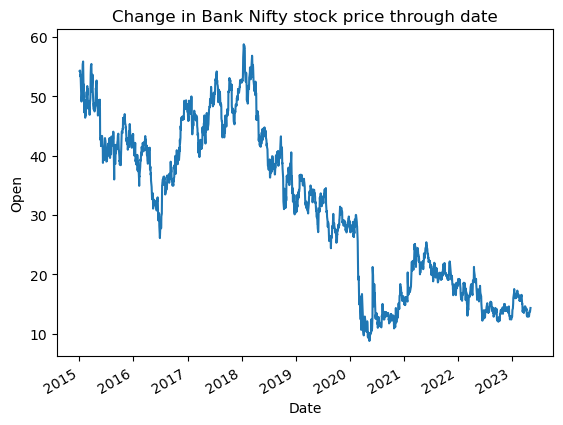

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1575, 3), (526, 3))

In [15]:
y_train.shape,y_test.shape

((1575,), (526,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[46.2631004  48.31350113 11.10849976 51.06030018 49.51060104 44.23579922
 43.72419998 42.08450069 32.10740055 25.83550016 52.87239956 12.40930001
 42.04610031 28.0750001  35.31999989 17.83039991 15.04459978 22.85589983
 45.10670101 12.62280007 41.91120098 17.72390003 16.53630028 47.97730038
 43.22570045 32.89350033 48.18580055 11.40020011 31.08630001 52.60160084
 15.76670003 51.07949993 33.61569988 14.02749994 16.98800005 46.37939987
 42.07110081 16.08140056 15.04359978 46.12940014 32.42849899 16.63759978
 28.00170042 47.56859928 13.55220012 41.17990051 35.67689987 18.73599987
 14.33010006 32.40319969 41.25420029 38.84159977 35.74749893 17.99789982
 31.33569963 28.1359001  31.58619999 16.79570004 42.41630043 16.88049994
 24.4926996  28.25349991 13.18069993 14.70269996 21.61619984 43.03530048
 13.88799992 13.22770009 28.62240036 39.62849983 52.80700008 47.38059959
 35.43599976 32.29960009 18.74740011 12.42330001 13.76719999 27.59680023
 43.45480019 50.25880051 41.58280033 39.7314003  52

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9990758270491277


In [22]:
y_test=list(y_test)

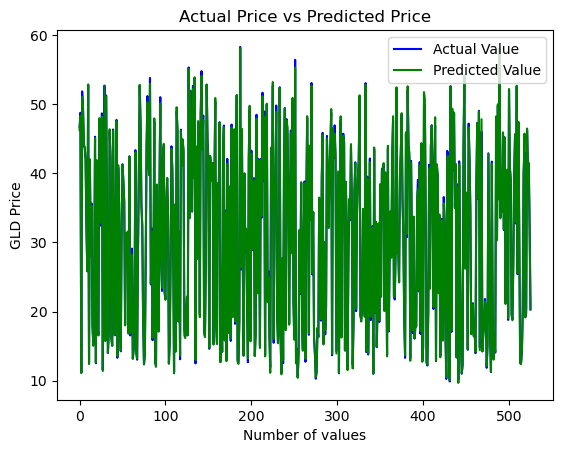

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

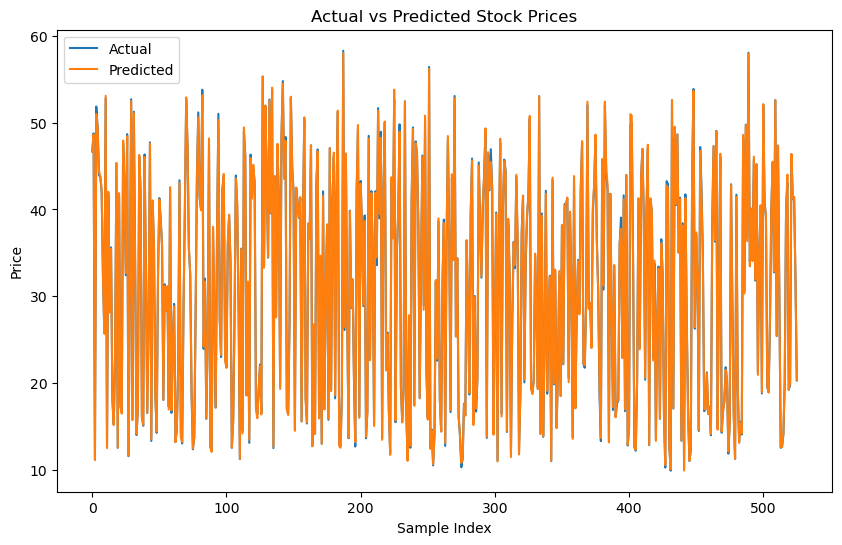

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([53.57260924, 53.68683796, 52.71119508, ..., 13.51637329,
       13.81541856, 14.49523015])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value324
enter a value34
enter a value23
-133.85454028358708


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AAL_model.pkl",'wb')
pickle.dump(model,file)